In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("../data/wrime.tsv", sep="\t")

df = df[
    [
        "Sentence",
        "Writer_Joy",
        "Reader1_Joy",
        "Reader2_Joy",
        "Reader3_Joy",
    ]
]

df["Sentence"] = df["Sentence"].replace(r"\\n", "", regex=True)
df["Readers_mean"] = df[["Reader1_Joy", "Reader2_Joy", "Reader3_Joy"]].mean(axis=1)
df["Readers_std"] = df[["Reader1_Joy", "Reader2_Joy", "Reader3_Joy"]].std(axis=1)
df["Difference"] = df["Writer_Joy"] - df["Readers_mean"]

df["Label"] = 0  # 客観3人のばらつきが大きい（標準偏差が1以上）
df.loc[df["Readers_std"] < 1, "Label"] = 1  # 主観と客観の差が少ない（差の絶対値が1以下）
df.loc[(df["Readers_std"] < 1) & (df["Difference"] > 1), "Label"] = 2  # 主観 > 客観
df.loc[(df["Readers_std"] < 1) & (df["Difference"] < -1), "Label"] = 3  # 主観 < 客観

train_df, test_df = train_test_split(
    df, test_size=0.20, random_state=0, stratify=df["Label"]
)

df.to_csv("../data/joy.tsv", sep="\t", index=False)
train_df.to_csv("../data/train.tsv", sep="\t", index=False)
test_df.to_csv("../data/test.tsv", sep="\t", index=False)

In [2]:
pd.DataFrame(
    {
        "train": train_df["Label"].value_counts().sort_index(),
        "test": test_df["Label"].value_counts().sort_index(),
        "all": df["Label"].value_counts().sort_index(),
    }
).set_axis(["(i)", "(ii)", "(iii)", "(iv)"], axis="index")

,train,test,all
(i),5313,1328,6641
(ii),25322,6331,31653
(iii),3509,877,4386
(iv),416,104,520


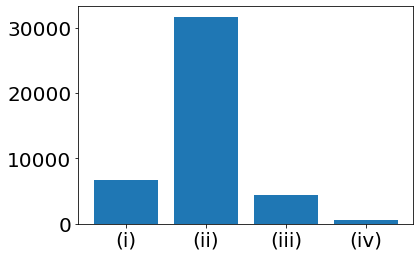

In [3]:
import matplotlib.pyplot as plt

plt.rcParams["font.size"] = 20
plt.bar(
    range(4),
    df["Label"].value_counts().sort_index(),
    tick_label=["(i)", "(ii)", "(iii)", "(iv)"],
)
plt.show()